# Project 2.
# Investigate a Dataset ,  and get insights of countries with good opportunity for investments or to run a business

### Table of Contents

Introduction
<br> Part1 Data Wrangling
<br> Part2 Exploratory Data Analysis
<br> Part3 Conclusions


# Introduction



*Data sets are taken from https://www.gapminder.org/data/  and used purely for educational purpose*

## Datasets used :
### 1.income per capita
### 2. export (high technology sector)
### 3. tax on profit
### 4. human development index
### 5. number of Master degrees 

## Questions:
### 1. Which countries are most appealing to invest in ?
### 2. Does countries with biggest number of high educated people have highest income?
### 3. Which countries had fastest export growth last years? tax on profit growth? salary increase growth? hdi growth?

## Assumptions:
### 1. higher tax on profit -  would suggest that country has more successful businesses running, which result in higher commercial profit and eventually higher tax on that profit
### 2. higher export - would suggest country has more successful businesses and higher companies revenues, since country produces good products which comes in demand for an export
### 3. the lower minimum wages and more high educated (and healthy people), more profitable to run a business in such country

### =>   lot of export  + high taxes on profit+ low wages + good level of education  = might indicate good investment opportunity


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 

# Part 1. Data Wrangling:

In [2]:
income=pd.read_csv('data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300


In [3]:
export=pd.read_csv('data/high_technology_exports_percent_of_manufactured_exports.csv')
export.tail(2)

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
163,Zambia,NaN,0.027,0.0176,0.0109,0.0223,0.0470,0.0243,0.0189,0.0766,0.3110,0.0408,0.0200,0.0231
164,Zimbabwe,NaN,0.144,0.0334,0.0195,0.0278,0.0622,0.0295,0.0147,0.0328,0.0517,0.0259,0.0205,0.0478


In [4]:
tax_profit=pd.read_csv('data/ic_tax_prft_cp_zs.csv')
tax_profit.head(2)

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,20.1,18.5,17.8,16.8,8.1,8.5,8.8,8.7,9.4,9.5,14.1,14.1,14.0,14.0,14.1


In [5]:
master=pd.read_csv('data/se_ter_cuat_ms_zs.csv')
master.head(2)

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,10.9,10.9,NaN,NaN,NaN


In [6]:
high_education = pd.read_csv('data/sl_tlf_advn_zs.csv')
high_education.head(2)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.3,NaN,NaN,64.7,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,74.5,73.1,73.4,74.4,73.3,74.1,73.2,62.1,62.7


HDI :human development index(health level + education level + living standards):

In [7]:
hdi = pd.read_csv('data/hdi_human_development_index.csv')
hdi.head(2) 

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791


## 1.1 Cleaning data and choosing right datasets:

### Datasets has  many missing values. Since for the Analysis we will track development of index year over year , we need to be more careful with how we fill in missing data:
#### Step1. Dropping rows and columns  with too many NaN values
#### Step2. if first value in a row is Null, fill it in with first not Null value in that row
#### Step3. if the last value in the row is Null, fill it in with last not null value in that row
#### Step4. the rest of "inner" missing values fill in with average of its non Null neighbours 

### Lets write custom function:

In [8]:
def fillna_first_column (df):
    for country in df.index:
        if np.isnan(df.loc[country][0]):
            idx = df.loc[country].first_valid_index()
            value = df.loc[country].loc[idx] 
            df.loc[country][0] = pd.Series(df.loc[country][0]).replace([df.loc[country][0]],value)
    return df

def fillna_last_column(df):
    for country in df.index:
        if np.isnan(df.loc[country][-1]):
            idx = df.loc[country].last_valid_index()
            value = df.loc[country].loc[idx] 
            df.loc[country][-1] = pd.Series(df.loc[country][-1]).replace([df.loc[country][-1]],value)
    return df

def fillna_middle_columns(df):
    for country in df.index:
        for column in df.columns:
            if np.isnan(df.loc[country][column]):
                idx_left = df.loc[country][:column].last_valid_index()
                value_left = df.loc[country].loc[idx_left] 
                idx_right = df.loc[country][column:].first_valid_index()
                value_right = df.loc[country][column:].loc[idx_right] 
                value = (value_left+value_right)/2
                df.loc[country][column] = pd.Series(df.loc[country][column]).replace([df.loc[country][column]],value)
    return df

def fillna_custom(df):
    df = fillna_first_column(df)
    df = fillna_last_column(df)
    df = fillna_middle_columns(df)
    return df

## Export dataset:

In [9]:
export= export.set_index('country')

In [10]:
export.isnull().sum()

2007     92
2008     63
2009     43
2010     36
2011     31
2012     30
2013     26
2014     22
2015     24
2016     18
2017     18
2018     39
2019    123
dtype: int64

In [11]:
export.shape

(165, 13)

In [12]:
nan_share_limit  = export.shape[0]*0.30
nan_share_limit

49.5

### Dataset has  many missing values. Dropping columns with too many NaN values:

In [13]:
export.drop(['2007','2019','2008'],axis=1,inplace=True)

In [14]:
export.head(2)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,
Albania,0.01330,0.01460,0.01020,0.00925,0.00890,0.00257,0.01630,0.00784,0.000958,0.000495
Algeria,0.00654,0.00528,0.00239,0.00142,0.00199,0.00191,0.00157,0.00350,0.006010,NaN


In [15]:
export.isnull().sum(axis=1).head()

country
Albania                0
Algeria                1
Andorra                0
Angola                 6
Antigua and Barbuda    7
dtype: int64

### Dropping rows with too many missing values and filling in left NaNs with mean values by country:

In [16]:
mask = export.isnull().sum(axis=1)<=5  


In [17]:
export = export[mask]


In [18]:
export.head(10)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,
Albania,0.013300,0.01460,0.01020,0.00925,0.00890,0.00257,0.01630,0.00784,0.000958,0.000495
Algeria,0.006540,0.00528,0.00239,0.00142,0.00199,0.00191,0.00157,0.00350,0.006010,NaN
Andorra,0.122000,0.23600,0.18500,0.20700,0.23600,0.20700,0.22600,0.24300,0.233000,0.285000
Argentina,0.090700,0.07750,0.07350,0.06670,0.07480,0.07070,0.09270,0.09020,0.092400,0.053300
Armenia,0.028400,0.02320,0.03370,0.02850,0.03030,0.03020,0.05650,0.06140,0.075700,0.070500
Australia,0.142000,0.13900,0.15200,0.14700,0.15200,0.15900,0.16300,0.17500,0.164000,0.167000
Austria,0.135000,0.13700,0.13300,0.14600,0.15400,0.15500,0.15100,0.14500,0.129000,0.116000
Azerbaijan,0.010100,0.01370,0.01790,0.07940,0.13700,0.08140,0.04200,0.02720,0.030500,0.040100
Bahrain,0.000312,0.00110,0.00152,0.00387,0.00592,0.01490,0.00936,0.01050,0.006240,0.004490


## Using custom function to fill Null values :

In [19]:
export = fillna_custom(export)

In [20]:
export.tail(10)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,
Uganda,0.01310,0.02570,0.22600,0.22100,0.02110,0.0268,0.0230,0.0205,0.0205,0.0354
Ukraine,0.05000,0.05000,0.05000,0.06910,0.06710,0.0753,0.0852,0.0722,0.0625,0.0541
United Arab Emirates,0.03760,0.03760,0.03760,0.03760,0.03610,0.1040,0.0531,0.3090,0.1190,0.1080
United Kingdom,0.20800,0.23500,0.23600,0.23800,0.23900,0.2250,0.2270,0.2400,0.2310,0.2260
United States,0.25000,0.23100,0.21100,0.20700,0.20700,0.2100,0.2190,0.2300,0.1970,0.1890
Uruguay,0.06000,0.06720,0.06220,0.09540,0.08900,0.0829,0.1430,0.1000,0.0815,0.0720
Vietnam,0.10500,0.13000,0.18600,0.26900,0.33200,0.3170,0.3475,0.3780,0.4140,0.4020
Yemen,0.00381,0.00365,0.00316,0.00216,0.00356,0.0131,0.0802,0.0802,0.0802,0.0802
Zambia,0.01760,0.01090,0.02230,0.04700,0.02430,0.0189,0.0766,0.3110,0.0408,0.0200


In [21]:
export.mean(axis=1)[:5]

country
Albania      0.008441
Algeria      0.003662
Andorra      0.218000
Argentina    0.078250
Armenia      0.043840
dtype: float64

In [22]:
countries = export.T.columns

In [23]:
countries

Index(['Albania', 'Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=143)

## Adding to all Datasets column with mean value of all years by country:

In [24]:
export['export_mean'] = export.mean(axis=1) 

In [25]:
export.sort_values('export_mean',ascending=False)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,export_mean
country,,,,,,,,,,,
Singapore,0.509000,0.523000,0.477000,0.484000,0.504000,0.508000,0.524000,0.524000,0.531000,0.517000,0.510100
Malaysia,0.509000,0.493000,0.472000,0.475000,0.484000,0.491000,0.482000,0.489000,0.505000,0.528000,0.492800
Malta,0.480000,0.472000,0.475000,0.461000,0.388000,0.348000,0.305000,0.220000,0.299000,0.322000,0.377000
Costa Rica,0.443000,0.402000,0.410000,0.398000,0.434000,0.365000,0.170000,0.185000,0.185000,0.185000,0.317700
Kazakhstan,0.302000,0.343000,0.248000,0.302000,0.372000,0.380000,0.414000,0.307000,0.228000,0.220000,0.311600
South Korea,0.320000,0.320000,0.281000,0.282000,0.298000,0.300000,0.312000,0.305000,0.325000,0.363000,0.310600
China,0.320000,0.321000,0.305000,0.309000,0.316000,0.297000,0.304000,0.302000,0.309000,0.314000,0.309700
Palau,0.202000,0.202000,0.202000,0.202000,0.202000,0.202000,0.412000,0.605000,0.268000,0.517000,0.301400
Vietnam,0.105000,0.130000,0.186000,0.269000,0.332000,0.317000,0.347500,0.378000,0.414000,0.402000,0.288050


## Income dataset:

In [26]:
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79900,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6750,6880,7020,7170,7310


In [27]:
income.shape

(193, 242)

In [28]:
#income.isnull().sum(axis=1)

### Income dataframe doesnt have any missing data

In [29]:
income = income.set_index('country')

In [30]:
income['mean_income'] = income.mean(axis=1)

In [31]:
income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2032,2033,2034,2035,2036,2037,2038,2039,2040,mean_income
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2600,2660,2710,2770,2820,2880,2940,3000,3060,1415.813278
Albania,667,667,667,667,667,668,668,668,668,668,...,19800,20200,20600,21000,21500,21900,22300,22800,23300,3754.340249
Algeria,715,716,717,718,719,720,721,722,723,724,...,14600,14900,15200,15500,15800,16100,16500,16800,17100,5127.000000
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,75100,76700,78300,79900,81500,83100,84800,86500,88300,16606.058091
Angola,618,620,623,626,628,631,634,637,640,642,...,6230,6350,6480,6610,6750,6880,7020,7170,7310,2580.278008


In [32]:
income.isnull().sum().head()

1800    0
1801    0
1802    0
1803    0
1804    0
dtype: int64

## Tax profit dataset:

In [33]:
tax_profit.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Albania,20.1,18.5,17.8,16.8,8.1,8.5,8.8,8.7,9.4,9.5,14.1,14.1,14.0,14.0,14.1
2,Algeria,9.9,9.9,8.3,8.3,6.5,6.5,6.5,6.5,6.5,6.5,6.5,8.2,8.1,8.1,8.1
3,Angola,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.3,25.3,21.7,20.4,21.5,21.5,21.5
4,Antigua and Barbuda,36.7,32.8,31.4,31.4,26.2,26.2,26.2,26.2,26.2,26.0,25.9,25.9,25.9,25.6,25.5


In [34]:
tax_profit = tax_profit.set_index('country')

In [35]:
tax_profit.shape

(186, 15)

In [36]:
tax_profit.isnull().sum(axis=1).head()

country
Afghanistan            0
Albania                0
Algeria                0
Angola                 0
Antigua and Barbuda    0
dtype: int64

In [37]:
nan_tax_profit_share = tax_profit.shape[0] * 0.3
nan_tax_profit_share

55.8

### Dataset has  many missing values. Dropping rows with too many NaN values :

In [38]:
mask_tax = tax_profit.isnull().sum(axis=1)<=(tax_profit.shape[1]/2)

In [39]:
tax_profit = tax_profit[mask_tax]

In [40]:
tax_profit.shape

(174, 15)

In [41]:
tax_profit['2005'][:15]

country
Afghanistan             0.0
Albania                20.1
Algeria                 9.9
Angola                 25.2
Antigua and Barbuda    36.7
Argentina               3.2
Armenia                15.8
Australia              26.3
Austria                21.2
Azerbaijan             13.7
Bahamas                 NaN
Bahrain                 NaN
Barbados                NaN
Belarus                21.4
Belgium                 9.8
Name: 2005, dtype: float64

## Filling in missing data with our custom function:

In [42]:
tax_profit = fillna_custom(tax_profit)

In [43]:
tax_profit.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,20.1,18.5,17.8,16.8,8.1,8.5,8.8,8.7,9.4,9.5,14.1,14.1,14.0,14.0,14.1
Algeria,9.9,9.9,8.3,8.3,6.5,6.5,6.5,6.5,6.5,6.5,6.5,8.2,8.1,8.1,8.1
Angola,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.3,25.3,21.7,20.4,21.5,21.5,21.5
Antigua and Barbuda,36.7,32.8,31.4,31.4,26.2,26.2,26.2,26.2,26.2,26.0,25.9,25.9,25.9,25.6,25.5


In [44]:
tax_profit['mean_tax_profit'] = tax_profit.mean(axis=1)

In [45]:
tax_profit.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean_tax_profit
country,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Albania,20.1,18.5,17.8,16.8,8.1,8.5,8.8,8.7,9.4,9.5,14.1,14.1,14.0,14.0,14.1,13.100000
Algeria,9.9,9.9,8.3,8.3,6.5,6.5,6.5,6.5,6.5,6.5,6.5,8.2,8.1,8.1,8.1,7.626667
Angola,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.3,25.3,21.7,20.4,21.5,21.5,21.5,23.920000
Antigua and Barbuda,36.7,32.8,31.4,31.4,26.2,26.2,26.2,26.2,26.2,26.0,25.9,25.9,25.9,25.6,25.5,27.873333


## Master degree dataset: 

In [46]:
master.head()

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,10.90,10.90,NaN,NaN,NaN
2,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.76,5.32,7.02,6.73,7.37,7.81,NaN
3,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.60,10.90,10.70,11.40,NaN,NaN
4,Bahamas,NaN,NaN,NaN,NaN,4.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
master.shape 

(101, 15)

In [48]:
master.isnull().sum()

country      0
2006       100
2007        99
2008        98
2009        96
2010        89
2011        89
2012        85
2013        69
2014        51
2015        52
2016        50
2017        62
2018        70
2019       100
dtype: int64

In [49]:
nan_master_share = master.shape[0] * 0.3 
nan_master_share

30.299999999999997

### Dataset has  many missing values. Dropping columns with too many NaN values:

In [50]:
master = master.drop(['2006','2007','2008','2009','2019','2010','2011'],axis = 1)

In [51]:
master = master.set_index('country')

In [52]:
master.shape

(101, 7)

In [53]:
master.isnull().sum(axis=1).head()

country
Albania      6
Andorra      4
Australia    1
Austria      3
Bahamas      7
dtype: int64

###  Dropping rows with too many NaN values:

In [54]:
mask_master = master.isnull().sum(axis=1)<4

In [55]:
master = master[mask_master]

In [56]:
master.head()

,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,
Australia,NaN,5.76,5.32,7.02,6.73,7.37,7.81
Austria,NaN,NaN,10.60,10.90,10.70,11.40,NaN
Bangladesh,1.73,1.97,2.06,3.33,3.48,3.79,4.02
Belgium,NaN,12.40,13.50,13.50,13.70,14.90,NaN
Colombia,2.80,3.10,3.28,3.16,3.32,NaN,3.57


###  Filling in missing data with custom function:

In [57]:
master = fillna_custom(master)

In [58]:
master.head()

,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,
Australia,5.76,5.76,5.32,7.02,6.73,7.370,7.81
Austria,10.60,10.60,10.60,10.90,10.70,11.400,11.40
Bangladesh,1.73,1.97,2.06,3.33,3.48,3.790,4.02
Belgium,12.40,12.40,13.50,13.50,13.70,14.900,14.90
Colombia,2.80,3.10,3.28,3.16,3.32,3.445,3.57


In [59]:
master['master_mean'] = master.mean(axis=1)

In [60]:
master.head()

,2012,2013,2014,2015,2016,2017,2018,master_mean
country,,,,,,,,
Australia,5.76,5.76,5.32,7.02,6.73,7.370,7.81,6.538571
Austria,10.60,10.60,10.60,10.90,10.70,11.400,11.40,10.885714
Bangladesh,1.73,1.97,2.06,3.33,3.48,3.790,4.02,2.911429
Belgium,12.40,12.40,13.50,13.50,13.70,14.900,14.90,13.614286
Colombia,2.80,3.10,3.28,3.16,3.32,3.445,3.57,3.239286


## High Education dataset:

In [61]:
high_education.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,84.3,NaN,NaN,64.7,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,74.5,73.1,73.4,74.4,73.3,74.1,73.2,62.1,62.7
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,89.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.8,83.6,82.5,82.6,82.2,NaN,NaN,79.0,79.6,80.4
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,69.1,65.0,70.3,74.5,76.9,74.6,73.6,74.1,NaN


In [62]:
high_education.shape 

(155, 31)

In [63]:
high_education.isnull().sum().head()

country      0
1990       153
1991       153
1992       143
1993       142
dtype: int64

### Dataset has  many missing values. Dropping columns/rows with too many NaN values :

In [64]:
high_education = high_education.set_index('country')

In [65]:
len(high_education.T.columns)

155

In [66]:
len(countries)

143

In [67]:
high_education = high_education.drop(['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011'],axis=1)

In [68]:
high_education.shape


(155, 8)

In [69]:
#high_education.isnull().sum(axis=1)

In [70]:
mask_edu = high_education.isnull().sum(axis=1)<4

In [71]:
high_education = high_education[mask_edu]

### Filling in missing values with custom function:

In [72]:
high_education = fillna_custom(high_education)

In [73]:
high_education.head()

,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,
Albania,73.1,73.4,74.4,73.3,74.1,73.2,62.1,62.7
Argentina,82.5,82.6,82.2,80.6,79.8,79.0,79.6,80.4
Armenia,65.0,70.3,74.5,76.9,74.6,73.6,74.1,74.1
Austria,76.6,76.9,76.8,76.9,76.9,77.4,76.7,76.7
Belgium,75.8,75.8,75.7,74.9,75.0,75.3,75.1,74.8


In [74]:
high_education['mean_high_education'] = high_education.mean(axis=1)

In [75]:
high_education.head()

,2012,2013,2014,2015,2016,2017,2018,2019,mean_high_education
country,,,,,,,,,
Albania,73.1,73.4,74.4,73.3,74.1,73.2,62.1,62.7,70.7875
Argentina,82.5,82.6,82.2,80.6,79.8,79.0,79.6,80.4,80.8375
Armenia,65.0,70.3,74.5,76.9,74.6,73.6,74.1,74.1,72.8875
Austria,76.6,76.9,76.8,76.9,76.9,77.4,76.7,76.7,76.8625
Belgium,75.8,75.8,75.7,74.9,75.0,75.3,75.1,74.8,75.3000


## HDI dataset:

In [76]:
hdi.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [77]:
hdi.shape

(188, 30)

In [78]:
hdi = hdi.set_index('country')

In [79]:
hdi.isnull().sum(axis = 1).head()

country
Afghanistan     0
Albania         0
Algeria         0
Andorra        10
Angola          9
dtype: int64

### Dataset has  many missing values. Dropping columns /rows with too many NaN values :

In [80]:
mask_hdi = hdi.isnull().sum(axis=1)<=15

In [81]:
mask_hdi.head()

country
Afghanistan    True
Albania        True
Algeria        True
Andorra        True
Angola         True
dtype: bool

In [82]:
hdi = hdi[mask_hdi]

In [83]:
hdi.isnull().sum().head()

1990    42
1991    42
1992    43
1993    42
1994    42
dtype: int64

In [84]:
nan_hdi_share_treshhold = hdi.shape[0] * 0.3
nan_hdi_share_treshhold

55.5

In [85]:
hdi.mean(axis=1).head()

country
Afghanistan    0.398310
Albania        0.699862
Algeria        0.676552
Andorra        0.826632
Angola         0.491650
dtype: float64

### Filling in missing values with custom function:

In [86]:
hdi = fillna_custom(hdi)

In [87]:
hdi.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,0.343,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,0.660,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,0.638,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
Andorra,0.759,0.759,0.759,0.759,0.759,0.759,0.759,0.759,0.759,0.759,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
Angola,0.384,0.384,0.384,0.384,0.384,0.384,0.384,0.384,0.384,0.384,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [88]:
hdi['mean_hdi'] = hdi.mean(axis=1)

In [89]:
hdi.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,mean_hdi
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,0.339,0.343,...,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496,0.398310
Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,0.649,0.660,...,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791,0.699862
Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,0.629,0.638,...,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759,0.676552
Andorra,0.759,0.759,0.759,0.759,0.759,0.759,0.759,0.759,0.759,0.759,...,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857,0.803310
Angola,0.384,0.384,0.384,0.384,0.384,0.384,0.384,0.384,0.384,0.384,...,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574,0.458241


## 1.2 Keeping datasets consistent in terms of countries:

In [90]:

hdi = hdi.loc[countries]

In [91]:
hdi.shape

(143, 30)

In [92]:
export.shape

(143, 11)

In [93]:
df_tax_profit = tax_profit.loc[countries]

/Users/katerynaisaieva/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [94]:
tax_profit.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean_tax_profit
country,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Albania,20.1,18.5,17.8,16.8,8.1,8.5,8.8,8.7,9.4,9.5,14.1,14.1,14.0,14.0,14.1,13.100000
Algeria,9.9,9.9,8.3,8.3,6.5,6.5,6.5,6.5,6.5,6.5,6.5,8.2,8.1,8.1,8.1,7.626667
Angola,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.2,25.3,25.3,21.7,20.4,21.5,21.5,21.5,23.920000
Antigua and Barbuda,36.7,32.8,31.4,31.4,26.2,26.2,26.2,26.2,26.2,26.0,25.9,25.9,25.9,25.6,25.5,27.873333


In [95]:
tax_profit.shape 

(174, 16)

In [96]:
high_education.shape 

(80, 9)

In [97]:
master.shape 

(37, 8)

In [98]:
income.shape 

(193, 242)

In [99]:
income = income.loc[countries]

In [100]:
income.shape

(143, 242)

## 1.3 Consistency in terms of years  columns of all  data sets:

In [101]:
export.columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'export_mean'],
      dtype='object')

In [102]:
tax_profit.columns

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'mean_tax_profit'],
      dtype='object')

In [103]:
hdi.columns 

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', 'mean_hdi'],
      dtype='object')

In [104]:
income.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040',
       'mean_income'],
      dtype='object', length=242)

In [105]:
high_education.columns 

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       'mean_high_education'],
      dtype='object')

In [106]:
master.columns 

Index(['2012', '2013', '2014', '2015', '2016', '2017', '2018', 'master_mean'], dtype='object')

### Lets keep only years which are present in all datasets:

In [107]:
years = [ '2012', '2013', '2014', '2015', '2016', '2017',
       '2018']

In [108]:
income = income[['2012', '2013', '2014', '2015', '2016', '2017',
       '2018']]

### Since mean_income column previosly didnt reflect accuratly mean, lets redo/adjust it:

In [109]:
income['mean_income'] = income.mean(axis=1)

In [110]:
hdi = hdi[['2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'mean_hdi']]

In [111]:
tax_profit = tax_profit[['2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'mean_tax_profit']]

In [112]:
export = export[['2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'export_mean']]

In [113]:
master = master[['2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'master_mean']]

In [114]:
high_education = high_education[['2012', '2013', '2014', '2015', '2016', '2017',
       '2018', 'mean_high_education']]

In [115]:
high_education.head()

,2012,2013,2014,2015,2016,2017,2018,mean_high_education
country,,,,,,,,
Albania,73.1,73.4,74.4,73.3,74.1,73.2,62.1,70.7875
Argentina,82.5,82.6,82.2,80.6,79.8,79.0,79.6,80.8375
Armenia,65.0,70.3,74.5,76.9,74.6,73.6,74.1,72.8875
Austria,76.6,76.9,76.8,76.9,76.9,77.4,76.7,76.8625
Belgium,75.8,75.8,75.7,74.9,75.0,75.3,75.1,75.3000


## 1.4 Sorting values by column with  mean :

In [116]:
income = income.sort_values(by='mean_income',ascending=False)

In [117]:
export = export.sort_values(by='export_mean',ascending=False)

In [118]:
x_labels = list(income.columns[:7])
x_labels

['2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [119]:
income_values = list(income.loc['Singapore'][:7].values)
income_values

[77500.0, 79900.0, 82000.0, 83300.0, 84700.0, 87800.0, 90100.0]

In [120]:
export_values = list(export.loc['Singapore'][:7].values)
export_values

[0.484, 0.504, 0.508, 0.524, 0.524, 0.531, 0.517]

In [121]:
income_lowest = income.sort_values(by='mean_income',ascending=True)

In [122]:
tax_profit = tax_profit.sort_values(by='mean_tax_profit',ascending=False)

In [123]:
master = master.sort_values(by='master_mean',ascending=False)

In [124]:
high_education = high_education.sort_values(by='mean_high_education',ascending=False)

# Part 2. Exploratory Data Analysis

# 2.1 Question 1.
## Does countries with biggest number of high educated people have highest income?

In [125]:
master_income = pd.merge(left=master,right=income,how='inner',left_index=True,right_index=True,suffixes=('_master','_inc'))

In [126]:
master_income = master_income.sort_values(by=['master_mean'],ascending=(False))

In [127]:
master_contries = list(master_income.index[:10])

In [128]:
master_values = list(master.loc[master_contries]['master_mean'].values)

In [129]:
income_values = list(master_income.loc[master_contries]['mean_income'].values)

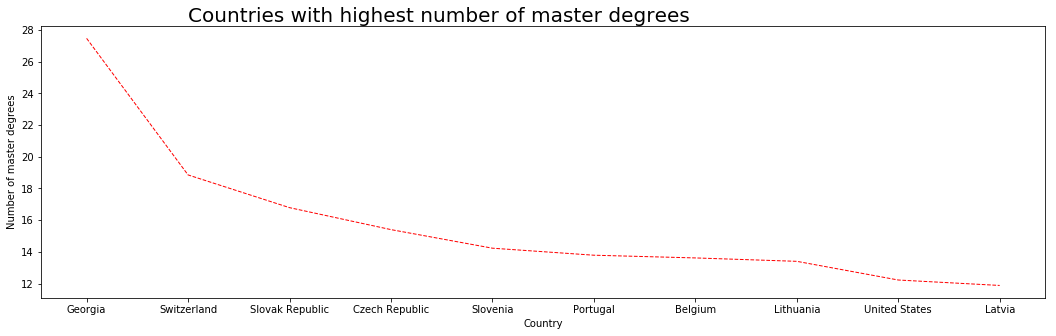

''

In [130]:
import matplotlib.pyplot as plt
import numpy as np

x = master_contries
y1 = master_values
#y2 = 

plt.figure(num = 3, figsize=(18, 5))
#plt.plot(x, y2)
plt.plot(x, y1, 
         color='red',   
         linewidth=1.0,  
         linestyle='--' 
        )
plt.text(1,28.5,'Countries with highest number of master degrees', fontsize=20)
plt.ylabel('Number of master degrees')
plt.xlabel('Country')
plt.show()

;


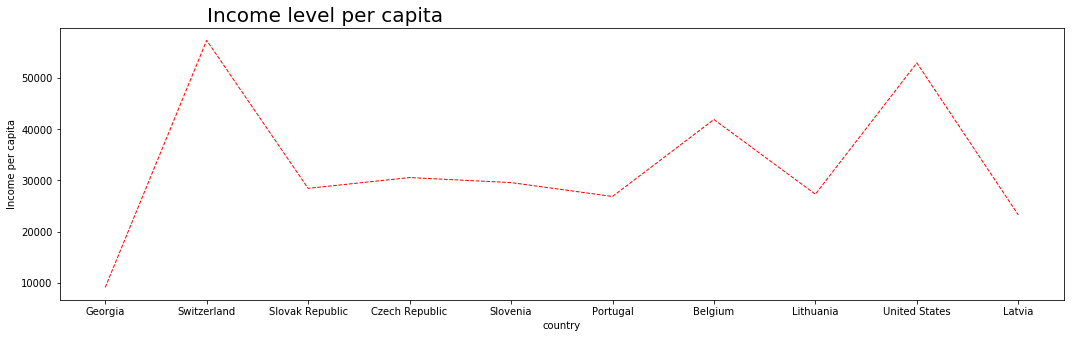

In [131]:
import matplotlib.pyplot as plt
import numpy as np
 
x = master_contries
y1 = income_values
#y2 = 

plt.figure(num = 3, figsize=(18, 5))
#plt.plot(x, y2)
plt.plot(x, y1, 
         color='red',   
         linewidth=1.0,  
         linestyle='--' 
        )
plt.text(1,61000,'Income level per capita ', fontsize=20)
plt.ylabel('Income per capita')
plt.xlabel('country')
plt.show();


# Insight1 : 

Countries with highly educated people(number of Master degree holders) doesnt nessasarily pushing wages in this countries up. If to look at top highest Master degree holders by country, the most educated in this context country - Georgia, has the poorest salary. And on other hand the lower by number of Master degree holders USA has the highest wages.

## => We have seen inverse proportion between number of master degrees and income. When companies looking for a candidates, since many people in a country have high degree education , they just lower down their salaries. Georgia, Slovak Republic could be considered as countries with potentially good opportunities to run a business - education is high and work force pay is low. Or these countries could be used as outsource partners

## 2.2 is there any Correlation between number of master degrees in country and income?

In [132]:
master_income.head(3)

,2012_master,2013_master,2014_master,2015_master,2016_master,2017_master,2018_master,master_mean,2012_inc,2013_inc,2014_inc,2015_inc,2016_inc,2017_inc,2018_inc,mean_income
country,,,,,,,,,,,,,,,,
Georgia,27.3,27.35,27.4,27.8,28.2,27.10,27.1,27.464286,8080,8380,8770,9010,9260,9700,10200,9057.142857
Switzerland,18.2,18.20,18.2,19.0,18.9,19.45,20.0,18.850000,56200,56500,57200,57300,57600,58000,59000,57400.000000
Slovak Republic,15.4,15.40,15.4,16.5,17.6,18.60,18.6,16.785714,26200,26600,27300,28400,29200,30100,31300,28442.857143


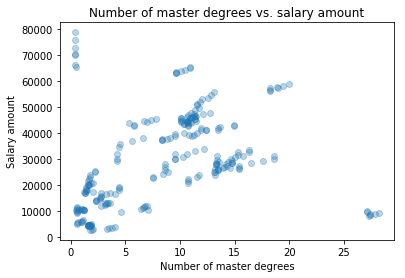

In [133]:
x = master_income.columns[master_income.columns.str.contains('_master')]
y = master_income.columns[(master_income.columns.str.contains('_inc'))&(master_income.columns != 'mean_income')]
plt.scatter(master_income[x] , master_income[y],alpha = 0.3)
plt.xlabel('Number of master degrees') 
plt.ylabel('Salary amount')
plt.title('Number of master degrees vs. salary amount');

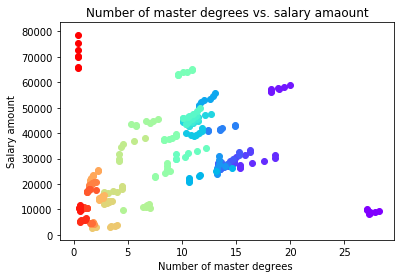

In [134]:
import matplotlib.cm as cm

ys = master_income.index
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for k, c in zip(ys, colors):
    plt.scatter(master_income.loc[k][x].values , master_income.loc[k][y].values, color=c)
plt.xlabel('Number of master degrees ') 
plt.ylabel('Salary amount')
plt.title('Number of master degrees vs. salary amaount');

### what  if to look only at means by country?

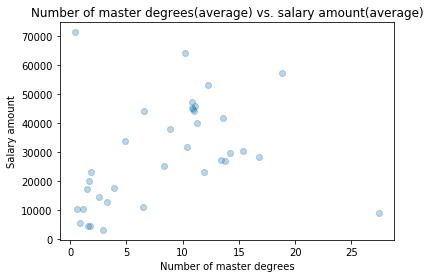

In [135]:
plt.scatter(master_income['master_mean'] , master_income['mean_income'],alpha = 0.3)
plt.xlabel('Number of master degrees') 
plt.ylabel('Salary amount')
plt.title('Number of master degrees(average) vs. salary amount(average)'); 

# Insight 2.  
## Overall Number of master degrees in a country in positive correlation with how high the salary is. More masters degrees in a country , the higher salary is

# 2.2 Question 2 .
## Which  countries consider for investments? 

## 2.2.1 Step 1 . Merging 4 data sets in one:

In [136]:
df1 = pd.merge(left=income,right = export,how='inner',left_index=True,right_index=True,suffixes=('_inc','_exp'))

In [137]:

# tax_profit.columns
# [i+'_tax' for i in tax_profit.columns]

In [138]:
# tax_profit.columns=[i+'_tax' for i in tax_profit.columns]

In [139]:
tax_profit.head()

,2012,2013,2014,2015,2016,2017,2018,mean_tax_profit
country,,,,,,,,
Palau,65.8,65.8,65.8,65.8,65.8,65.8,65.8,65.846667
"Congo, Dem. Rep.",58.9,33.4,27.5,27.5,27.5,27.5,27.5,44.380000
Bhutan,33.0,33.9,33.9,33.9,33.9,33.9,33.9,33.420000
St. Vincent and the Grenadines,30.2,30.2,30.2,29.8,29.8,29.8,29.8,31.886667
St. Kitts and Nevis,32.2,32.3,30.5,30.5,30.5,30.5,30.5,31.806667


In [140]:
df2 = pd.merge(left=tax_profit,right = hdi,how='inner',left_index=True,right_index=True,suffixes=('_tax','_hdi'))

In [141]:
df_data = pd.merge(left=df1,right = df2,how='inner',left_index=True,right_index=True)

In [142]:
df_data.sort_values(by=['export_mean','mean_tax_profit','mean_income','mean_hdi'],ascending=[False,False,True,False])

,2012_inc,2013_inc,2014_inc,2015_inc,2016_inc,2017_inc,2018_inc,mean_income,2012_exp,2013_exp,...,2018_tax,mean_tax_profit,2012_hdi,2013_hdi,2014_hdi,2015_hdi,2016_hdi,2017_hdi,2018_hdi,mean_hdi
country,,,,,,,,,,,,,,,,,,,,,
Singapore,77500,79900,82000,83300,84700,87800,90100,83614.285714,0.484000,0.504000,...,1.7,4.280000,0.920,0.923,0.928,0.929,0.933,0.934,0.935,0.845207
Malaysia,22700,23400,24500,25400,26100,27300,28200,25371.428571,0.475000,0.484000,...,21.8,19.673333,0.782,0.787,0.792,0.797,0.801,0.802,0.804,0.734828
Malta,29100,30000,31900,34500,35600,37000,38100,33742.857143,0.461000,0.388000,...,32.3,30.773333,0.854,0.861,0.868,0.877,0.881,0.883,0.885,0.813172
Costa Rica,13800,13900,14300,14600,15100,15400,15700,14685.714286,0.398000,0.434000,...,19.2,19.220000,0.774,0.777,0.785,0.786,0.789,0.792,0.794,0.728793
Kazakhstan,22000,23000,23600,23500,23400,24100,24700,23471.428571,0.302000,0.372000,...,16.2,18.646667,0.782,0.791,0.798,0.806,0.808,0.813,0.817,0.732207
South Korea,31800,32500,33400,34200,35000,35900,36800,34228.571429,0.282000,0.298000,...,18.2,18.513333,0.890,0.893,0.896,0.899,0.901,0.904,0.906,0.836448
Palau,15100,14900,15500,17100,17200,16500,17200,16214.285714,0.202000,0.202000,...,65.8,65.846667,0.787,0.811,0.809,0.803,0.808,0.811,0.814,0.762345
Vietnam,4860,5070,5310,5610,5900,6230,6610,5655.714286,0.269000,0.332000,...,13.2,16.480000,0.668,0.673,0.675,0.680,0.685,0.690,0.693,0.600862
France,37400,37400,37600,37800,38100,39000,39600,38128.571429,0.269000,0.273000,...,0.3,4.373333,0.878,0.882,0.887,0.888,0.887,0.890,0.891,0.850862


## Metodology 1.: lets keep for investigation only columns with mean values and sort them out by prioritizing subjectivelly the most important features:

In [143]:
df_result = df_data[['export_mean','mean_tax_profit','mean_income','mean_hdi']]


In [144]:
df_result = df_result.sort_values(by=['export_mean','mean_tax_profit','mean_income','mean_hdi'],ascending=[False,False,True,False])


In [145]:
df_result.head(10)

,export_mean,mean_tax_profit,mean_income,mean_hdi
country,,,,
Singapore,0.51010,4.280000,83614.285714,0.845207
Malaysia,0.49280,19.673333,25371.428571,0.734828
Malta,0.37700,30.773333,33742.857143,0.813172
Costa Rica,0.31770,19.220000,14685.714286,0.728793
Kazakhstan,0.31160,18.646667,23471.428571,0.732207
South Korea,0.31060,18.513333,34228.571429,0.836448
Palau,0.30140,65.846667,16214.285714,0.762345
Vietnam,0.28805,16.480000,5655.714286,0.600862
France,0.26660,4.373333,38128.571429,0.850862


In [146]:
#df_result2 = df_result.sort_values(by=['mean_tax_profit','export_mean','mean_income','mean_hdi'],ascending=[False,False,True,False])


In [147]:
#df_result2.head(10)

# Insight 3 . 
### According to the first Methodology,  countries  - Singapore, Malaysia, Palau, Malta, Costa Rica, Kazakhstan,South Korea - could be potentially good opportunity for investment. Those have high export for high technology sector, tax on profit was high  along with suttisfactory income and human development index.

## Methodology 2. Now lets look at it differently, giving particular weights to each contributor, and see which countries are best for investments taking into account all 4 variables. For that lets  do next steps:

1. Normilize each column
2. add weights to each of columns
3. create new column based on weights with top countries 

In [148]:
import sklearn as sk

In [149]:
from sklearn.preprocessing import MinMaxScaler


In [150]:
# MinMaxScaler?

In [151]:
vals = df_result.values
obj = MinMaxScaler()
vals_scaled = obj.fit_transform(vals)
df_result_normalized = pd.DataFrame(vals_scaled)

In [152]:
df_result_normalized.head()

,0,1,2,3
0,1.000000,0.064999,0.719971,0.885162
1,0.965976,0.298775,0.214131,0.710863
2,0.738233,0.467348,0.286837,0.834577
3,0.621609,0.291890,0.121326,0.701334
4,0.609612,0.283183,0.197630,0.706725


In [153]:
df_result_normalized.columns 

RangeIndex(start=0, stop=4, step=1)

In [154]:
df_result_normalized = df_result_normalized.rename(columns={0:"export_mean",1:"mean_tax_profit",2:"mean_income",3:"mean_hdi"})

In [155]:
df_result_normalized.head()

,export_mean,mean_tax_profit,mean_income,mean_hdi
0,1.000000,0.064999,0.719971,0.885162
1,0.965976,0.298775,0.214131,0.710863
2,0.738233,0.467348,0.286837,0.834577
3,0.621609,0.291890,0.121326,0.701334
4,0.609612,0.283183,0.197630,0.706725


In [156]:
index_dict = dict(zip(df_result_normalized.index,df_result.index))

In [157]:
df_result_normalized = df_result_normalized.rename(index = index_dict)

In [158]:
df_result_normalized.head()

,export_mean,mean_tax_profit,mean_income,mean_hdi
Singapore,1.000000,0.064999,0.719971,0.885162
Malaysia,0.965976,0.298775,0.214131,0.710863
Malta,0.738233,0.467348,0.286837,0.834577
Costa Rica,0.621609,0.291890,0.121326,0.701334
Kazakhstan,0.609612,0.283183,0.197630,0.706725


In [159]:
df_result_normalized['investment_evaluation'] = 0.4 * df_result_normalized['export_mean'] + 0.25 * df_result_normalized['mean_tax_profit'] + (-0.25)* df_result_normalized['mean_income'] + 0.1 * df_result_normalized['mean_hdi']

In [160]:
df_result_normalized.head(10)

,export_mean,mean_tax_profit,mean_income,mean_hdi,investment_evaluation
Singapore,1.000000,0.064999,0.719971,0.885162,0.324773
Malaysia,0.965976,0.298775,0.214131,0.710863,0.478638
Malta,0.738233,0.467348,0.286837,0.834577,0.423879
Costa Rica,0.621609,0.291890,0.121326,0.701334,0.361418
Kazakhstan,0.609612,0.283183,0.197630,0.706725,0.335906
South Korea,0.607645,0.281158,0.291056,0.871331,0.327717
Palau,0.589552,1.000000,0.134601,0.754315,0.527602
Vietnam,0.563296,0.250278,0.042900,0.499319,0.327095
France,0.521111,0.066417,0.324927,0.894092,0.233226
Ireland,0.515407,0.184469,0.488950,0.915219,0.221565


# Insight 4. According to weighted Methodology 2, top 5 countries with highest investment potential:
- Palau
- Malaysia
- Malta
- Costa Rica
- Kazakhstan

# Methodology 3. 
## Now, lets  abstract it , depict and track a trend overall, year over year, by :
### 1. Since lower wages benefit  business  profit outcome, lets invert income variable
### 2. abstract all 4 columns - (mean-export, mean_tax_profit,mean_income,mean) and take  the average of those 4 features and adding it to new column - business index and track it year over year. 
### 3. Depict trends for each country and identify good business opportunities

### lets normilize  all data year over year: 

In [161]:
df_data.head(3)

,2012_inc,2013_inc,2014_inc,2015_inc,2016_inc,2017_inc,2018_inc,mean_income,2012_exp,2013_exp,...,2018_tax,mean_tax_profit,2012_hdi,2013_hdi,2014_hdi,2015_hdi,2016_hdi,2017_hdi,2018_hdi,mean_hdi
country,,,,,,,,,,,,,,,,,,,,,
Qatar,120000,118000,117000,116000,114000,113000,113000,115857.142857,0.000051,0.000006,...,0.0,0.000000,0.850,0.857,0.854,0.851,0.847,0.848,0.848,0.820069
Luxembourg,89500,90700,92300,93700,93900,93100,93700,92414.285714,0.086800,0.068500,...,4.2,4.346667,0.892,0.892,0.895,0.899,0.904,0.908,0.909,0.863448
Singapore,77500,79900,82000,83300,84700,87800,90100,83614.285714,0.484000,0.504000,...,1.7,4.280000,0.920,0.923,0.928,0.929,0.933,0.934,0.935,0.845207


In [162]:
vals_years = df_data.values
obj2 = MinMaxScaler()
vals_years_scaled = obj2.fit_transform(vals_years)
df_data_normalized = pd.DataFrame(vals_years_scaled) 

In [163]:
df_data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.847682,0.851913,0.846284,0.835034,0.822526,0.818966,0.816291,0.845467
1,0.744239,0.767307,0.787660,0.806586,0.822612,0.822842,0.828200,0.796399,0.179253,0.118709,...,0.063830,0.066012,0.917219,0.910150,0.915541,0.916667,0.919795,0.922414,0.922010,0.913967
2,0.643612,0.675253,0.699114,0.716385,0.741420,0.775659,0.796155,0.719971,1.000000,0.873482,...,0.025836,0.064999,0.963576,0.961730,0.971284,0.967687,0.969283,0.967241,0.967071,0.885162
3,0.683024,0.670139,0.650972,0.645264,0.632869,0.639452,0.633256,0.650987,0.311911,0.294620,...,0.001520,0.195201,0.836093,0.830283,0.831081,0.821429,0.817406,0.810345,0.811092,0.837789
4,0.653675,0.638601,0.618304,0.603632,0.612571,0.581586,0.577176,0.612649,0.045664,0.028760,...,0.000000,0.000000,0.764901,0.753744,0.755068,0.760204,0.757679,0.751724,0.746967,0.771958


In [164]:
columns_dict = dict(zip(df_data_normalized.columns,df_data.columns)) 

In [165]:
index_dict = dict(zip(df_data_normalized.index,df_data.index))

In [166]:
df_data_normalized = df_data_normalized.rename(columns = columns_dict,index = index_dict)

In [167]:
df_data_normalized.head()

,2012_inc,2013_inc,2014_inc,2015_inc,2016_inc,2017_inc,2018_inc,mean_income,2012_exp,2013_exp,...,2018_tax,mean_tax_profit,2012_hdi,2013_hdi,2014_hdi,2015_hdi,2016_hdi,2017_hdi,2018_hdi,mean_hdi
Qatar,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.847682,0.851913,0.846284,0.835034,0.822526,0.818966,0.816291,0.845467
Luxembourg,0.744239,0.767307,0.787660,0.806586,0.822612,0.822842,0.828200,0.796399,0.179253,0.118709,...,0.063830,0.066012,0.917219,0.910150,0.915541,0.916667,0.919795,0.922414,0.922010,0.913967
Singapore,0.643612,0.675253,0.699114,0.716385,0.741420,0.775659,0.796155,0.719971,1.000000,0.873482,...,0.025836,0.064999,0.963576,0.961730,0.971284,0.967687,0.969283,0.967241,0.967071,0.885162
Brunei,0.683024,0.670139,0.650972,0.645264,0.632869,0.639452,0.633256,0.650987,0.311911,0.294620,...,0.001520,0.195201,0.836093,0.830283,0.831081,0.821429,0.817406,0.810345,0.811092,0.837789
Kuwait,0.653675,0.638601,0.618304,0.603632,0.612571,0.581586,0.577176,0.612649,0.045664,0.028760,...,0.000000,0.000000,0.764901,0.753744,0.755068,0.760204,0.757679,0.751724,0.746967,0.771958


### lets invert income data, since we assume that country with lower wages have more potential for running a business:

In [168]:
income_columns = df_data_normalized.columns[df_data_normalized.columns.str.contains('_inc')]

In [169]:
df_data_normalized[income_columns].head(5)

,2012_inc,2013_inc,2014_inc,2015_inc,2016_inc,2017_inc,2018_inc,mean_income
Qatar,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Luxembourg,0.744239,0.767307,0.787660,0.806586,0.822612,0.822842,0.828200,0.796399
Singapore,0.643612,0.675253,0.699114,0.716385,0.741420,0.775659,0.796155,0.719971
Brunei,0.683024,0.670139,0.650972,0.645264,0.632869,0.639452,0.633256,0.650987
Kuwait,0.653675,0.638601,0.618304,0.603632,0.612571,0.581586,0.577176,0.612649


In [170]:
df_data_normalized[income_columns] = 1- df_data_normalized[income_columns]

In [171]:
df_data_normalized[income_columns].round(4).head() 

,2012_inc,2013_inc,2014_inc,2015_inc,2016_inc,2017_inc,2018_inc,mean_income
Qatar,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Luxembourg,0.2558,0.2327,0.2123,0.1934,0.1774,0.1772,0.1718,0.2036
Singapore,0.3564,0.3247,0.3009,0.2836,0.2586,0.2243,0.2038,0.2800
Brunei,0.3170,0.3299,0.3490,0.3547,0.3671,0.3605,0.3667,0.3490
Kuwait,0.3463,0.3614,0.3817,0.3964,0.3874,0.4184,0.4228,0.3874


### lets abstract and take average of 4 variables - export, tax on profit, income and hdi - for each  year, and populating the with them new column "business index":

In [172]:
df_data_normalized.round(4).head()

,2012_inc,2013_inc,2014_inc,2015_inc,2016_inc,2017_inc,2018_inc,mean_income,2012_exp,2013_exp,...,2018_tax,mean_tax_profit,2012_hdi,2013_hdi,2014_hdi,2015_hdi,2016_hdi,2017_hdi,2018_hdi,mean_hdi
Qatar,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.8477,0.8519,0.8463,0.8350,0.8225,0.8190,0.8163,0.8455
Luxembourg,0.2558,0.2327,0.2123,0.1934,0.1774,0.1772,0.1718,0.2036,0.1793,0.1187,...,0.0638,0.0660,0.9172,0.9101,0.9155,0.9167,0.9198,0.9224,0.9220,0.9140
Singapore,0.3564,0.3247,0.3009,0.2836,0.2586,0.2243,0.2038,0.2800,1.0000,0.8735,...,0.0258,0.0650,0.9636,0.9617,0.9713,0.9677,0.9693,0.9672,0.9671,0.8852
Brunei,0.3170,0.3299,0.3490,0.3547,0.3671,0.3605,0.3667,0.3490,0.3119,0.2946,...,0.0015,0.1952,0.8361,0.8303,0.8311,0.8214,0.8174,0.8103,0.8111,0.8378
Kuwait,0.3463,0.3614,0.3817,0.3964,0.3874,0.4184,0.4228,0.3874,0.0457,0.0288,...,0.0000,0.0000,0.7649,0.7537,0.7551,0.7602,0.7577,0.7517,0.7470,0.7720


In [173]:
col_2012 = df_data_normalized.columns[df_data_normalized.columns.str.contains('2012_')]
col_2013 = df_data_normalized.columns[df_data_normalized.columns.str.contains('2013_')]
col_2014 = df_data_normalized.columns[df_data_normalized.columns.str.contains('2014_')]
col_2015 = df_data_normalized.columns[df_data_normalized.columns.str.contains('2015_')]
col_2016 = df_data_normalized.columns[df_data_normalized.columns.str.contains('2016_')]
col_2017 = df_data_normalized.columns[df_data_normalized.columns.str.contains('2017_')]
col_2018 = df_data_normalized.columns[df_data_normalized.columns.str.contains('2018_')]

In [174]:
df_data_normalized.round(4).head()

,2012_inc,2013_inc,2014_inc,2015_inc,2016_inc,2017_inc,2018_inc,mean_income,2012_exp,2013_exp,...,2018_tax,mean_tax_profit,2012_hdi,2013_hdi,2014_hdi,2015_hdi,2016_hdi,2017_hdi,2018_hdi,mean_hdi
Qatar,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.8477,0.8519,0.8463,0.8350,0.8225,0.8190,0.8163,0.8455
Luxembourg,0.2558,0.2327,0.2123,0.1934,0.1774,0.1772,0.1718,0.2036,0.1793,0.1187,...,0.0638,0.0660,0.9172,0.9101,0.9155,0.9167,0.9198,0.9224,0.9220,0.9140
Singapore,0.3564,0.3247,0.3009,0.2836,0.2586,0.2243,0.2038,0.2800,1.0000,0.8735,...,0.0258,0.0650,0.9636,0.9617,0.9713,0.9677,0.9693,0.9672,0.9671,0.8852
Brunei,0.3170,0.3299,0.3490,0.3547,0.3671,0.3605,0.3667,0.3490,0.3119,0.2946,...,0.0015,0.1952,0.8361,0.8303,0.8311,0.8214,0.8174,0.8103,0.8111,0.8378
Kuwait,0.3463,0.3614,0.3817,0.3964,0.3874,0.4184,0.4228,0.3874,0.0457,0.0288,...,0.0000,0.0000,0.7649,0.7537,0.7551,0.7602,0.7577,0.7517,0.7470,0.7720


In [175]:
df_business_trend = pd.DataFrame(index=df_data_normalized.index)


In [176]:
df_data_normalized[col_2012].round(2).head()

,2012_inc,2012_exp,2012_tax,2012_hdi
Qatar,0.00,0.00,0.00,0.85
Luxembourg,0.26,0.18,0.06,0.92
Singapore,0.36,1.00,0.00,0.96
Brunei,0.32,0.31,0.10,0.84
Kuwait,0.35,0.05,0.00,0.76


In [177]:
df_business_trend['2012'] = df_data_normalized[col_2012].T.mean()

In [178]:
df_business_trend['2013'] = df_data_normalized[col_2013].T.mean()
df_business_trend['2014'] = df_data_normalized[col_2014].T.mean()
df_business_trend['2015'] = df_data_normalized[col_2015].T.mean()
df_business_trend['2016'] = df_data_normalized[col_2016].T.mean()
df_business_trend['2017'] = df_data_normalized[col_2017].T.mean()
df_business_trend['2018'] = df_data_normalized[col_2018].T.mean()

In [179]:
df_business_trend.head(5)

,2012,2013,2014,2015,2016,2017,2018
Qatar,0.211921,0.212978,0.211775,0.233562,0.205631,0.204777,0.204073
Luxembourg,0.354015,0.331345,0.324199,0.329395,0.320976,0.310837,0.322407
Singapore,0.579991,0.546829,0.534735,0.570023,0.505884,0.452250,0.543980
Brunei,0.392461,0.393706,0.364470,0.388523,0.347090,0.377928,0.295033
Kuwait,0.289223,0.285976,0.284746,0.290247,0.286802,0.293103,0.311950


### lets  sort it out by last year:

In [180]:
df_business_trend = df_business_trend.sort_values(by='2018',ascending=False) 

In [181]:
df_business_trend.head()

,2012,2013,2014,2015,2016,2017,2018
Palau,0.760080,0.751058,0.744458,0.849305,0.874337,0.728590,0.897325
Malaysia,0.699975,0.677594,0.670961,0.698932,0.645437,0.599851,0.706548
Malta,0.756999,0.685392,0.659399,0.657087,0.596848,0.595399,0.661966
St. Kitts and Nevis,0.677369,0.647447,0.599419,0.604731,0.594871,0.575434,0.641506
South Korea,0.631978,0.609168,0.602507,0.624980,0.583913,0.560606,0.639799


## Which country has fastest business potential growth?

In [182]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [183]:
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [184]:
years 

['2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [185]:
countries_list_business = list(df_business_trend.index)[:17] 

In [186]:
countries_list_business

['Palau',
 'Malaysia',
 'Malta',
 'St. Kitts and Nevis',
 'South Korea',
 'Sao Tome and Principe',
 'Ethiopia',
 'Vietnam',
 'Israel',
 'Thailand',
 'Lao',
 'Australia',
 'United Kingdom',
 'New Zealand',
 'Netherlands',
 'Greece',
 'Costa Rica']

Text(0.5,0,'Year')

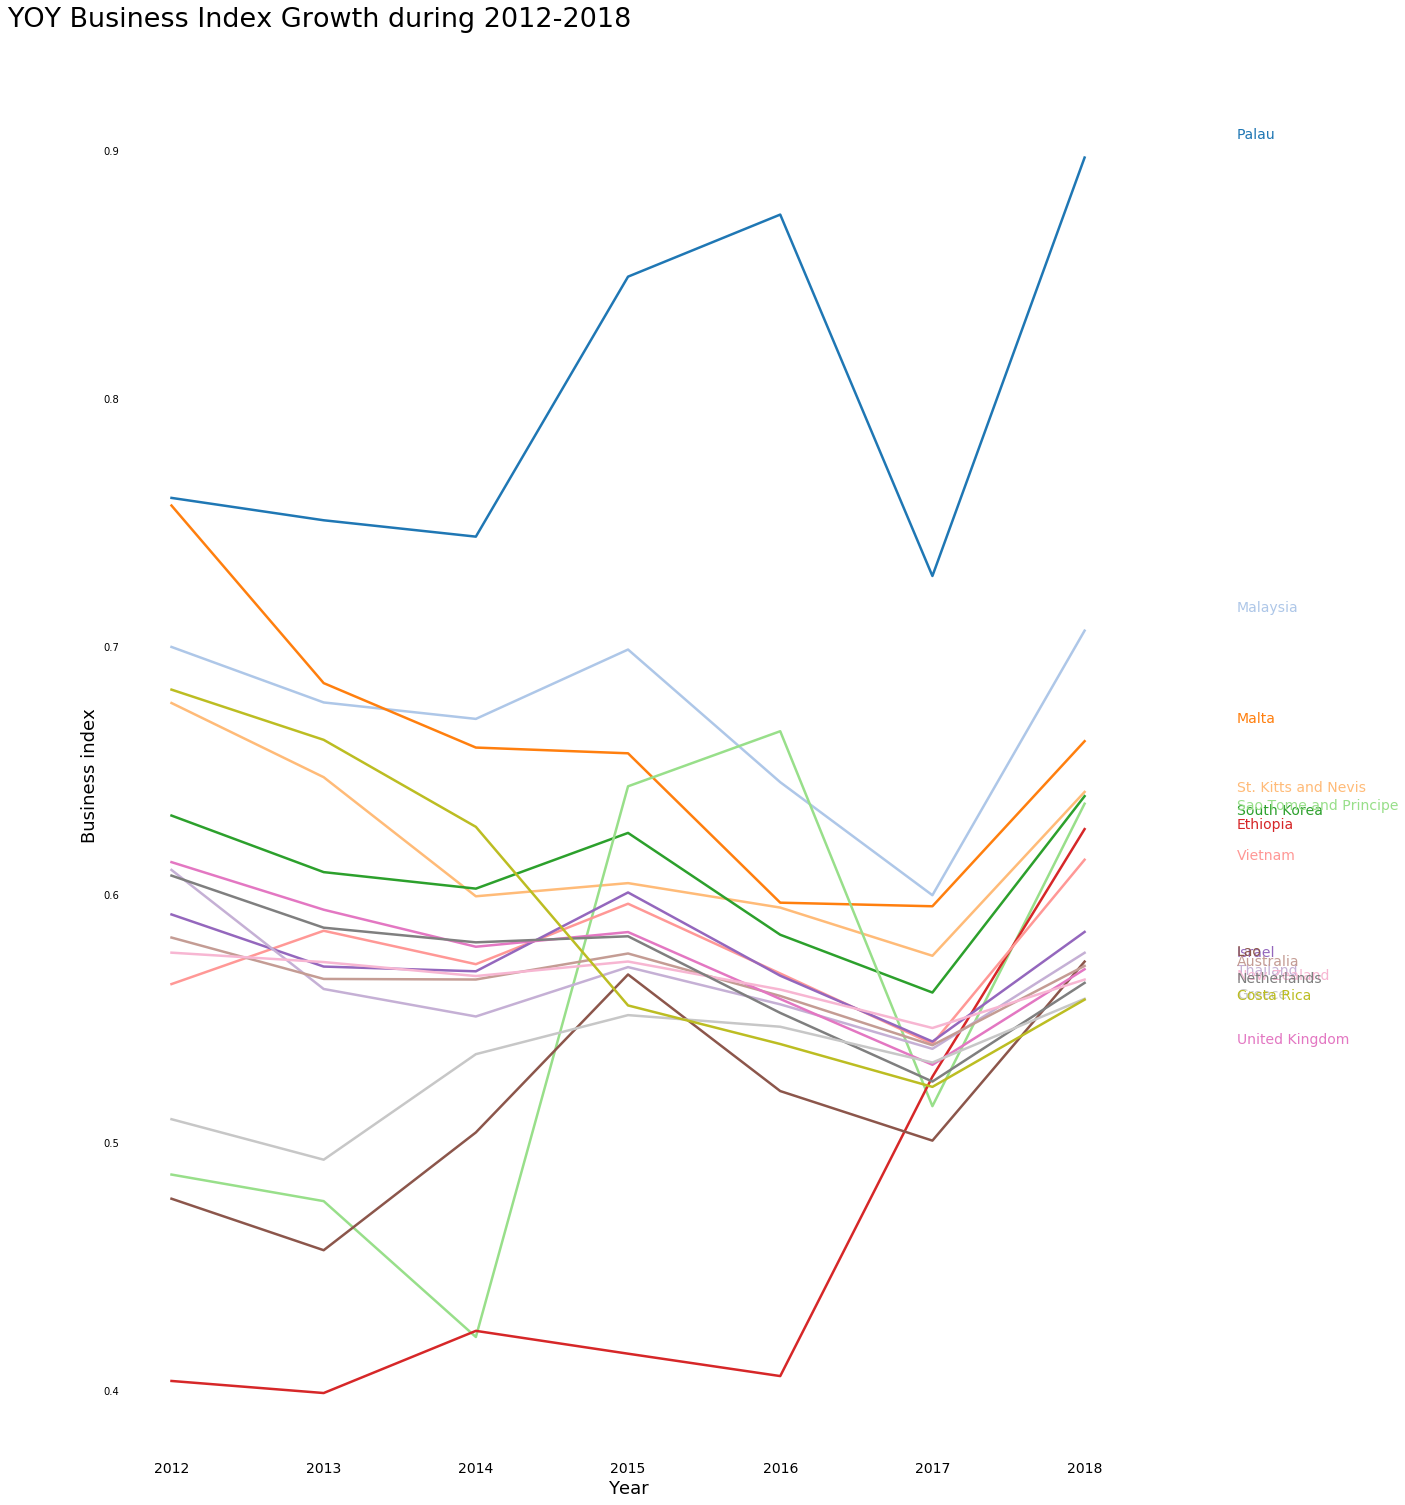

In [187]:
    
plt.figure(figsize=(18, 25))    
 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
   
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  

plt.xticks(fontsize=14)    
     
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)     

for rank, country in enumerate(countries_list_business):    
 
        x = years
        y1 = df_business_trend.loc[country][years]
        plt.plot(x,y1,lw=2.5, color=tableau20[rank])    

  
        y_pos = df_business_trend.loc[country][years][-1] # + 0.005    
        if country == 'Malaysia':  
            y_pos += 0.0075    
        elif country == 'Singapore':    
            y_pos -= 0.005    
        elif country == 'Palau':    
            y_pos += 0.0075    
        elif country == 'Sao Tome and Principe':    
            y_pos -= 0.0025    
        elif country == 'Vietnam':    
            y_pos -= 0.0    
        elif country == 'Lao':    
            y_pos += 0.0025    
        elif country == 'South Korea':    
            y_pos -= 0.0075    
        elif country == 'Malta':    
            y_pos += 0.0075    
        elif country == 'China':    
            y_pos -= 0.0075    
        elif country == 'Andorra':    
            y_pos += 0.0075    
        elif country == 'France':    
            y_pos -= 0.0025 
        elif country == 'Ireland':    
            y_pos -= 0.0025 
        elif country == 'Iceland':    
            y_pos -= 0.003 
        elif country == 'Thailand':    
            y_pos -= 0.009 
        elif country == 'Israel':    
            y_pos -= 0.01
        elif country == 'Niger':    
            y_pos -= 0.02 
        elif country == 'United Kingdom':    
            y_pos -= 0.03
    
        plt.text('2018+0.002', y_pos, country, fontsize=14, color=tableau20[rank])    
    
plt.text( 1,0.95,"YOY Business Index Growth during 2012-2018 ", fontsize=27, ha="center")  ;  
plt.ylabel('Business index',size = 18)
plt.xlabel('Year',size = 18)

# Insight 5 .
## According to our last Methodology 3, best countries to invest in, with growing business potential:
- Palau
- Malasya
- Sao Tome and Principe
- South Korea
- Ephiopia*

*showed promising trend and could be investigated further

# 2.3 Question 3.
## Which countries had fastest export growth last years? tax on profit growth? salary increase growth? hdi growth?

## 2.3.1 Fastest export growth last years:

In [188]:


export = export.sort_values(by='2018',ascending=False)
export.head(10)

,2012,2013,2014,2015,2016,2017,2018,export_mean
country,,,,,,,,
Malaysia,0.4750,0.4840,0.4910,0.4820,0.4890,0.505,0.528,0.492800
Ethiopia,0.0315,0.0308,0.0964,0.0678,0.0655,0.518,0.518,0.145480
Singapore,0.4840,0.5040,0.5080,0.5240,0.5240,0.531,0.517,0.510100
Palau,0.2020,0.2020,0.2020,0.4120,0.6050,0.268,0.517,0.301400
Sao Tome and Principe,0.1450,0.1450,0.0139,0.4700,0.6820,0.347,0.460,0.232290
Vietnam,0.2690,0.3320,0.3170,0.3475,0.3780,0.414,0.402,0.288050
Lao,0.0870,0.0978,0.2490,0.3520,0.3360,0.374,0.371,0.208470
South Korea,0.2820,0.2980,0.3000,0.3120,0.3050,0.325,0.363,0.310600
St. Kitts and Nevis,0.3580,0.3510,0.2760,0.2560,0.3130,0.346,0.346,0.226062


In [189]:
years 

['2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [190]:
countries_list = list(export.index)[:17]  

''

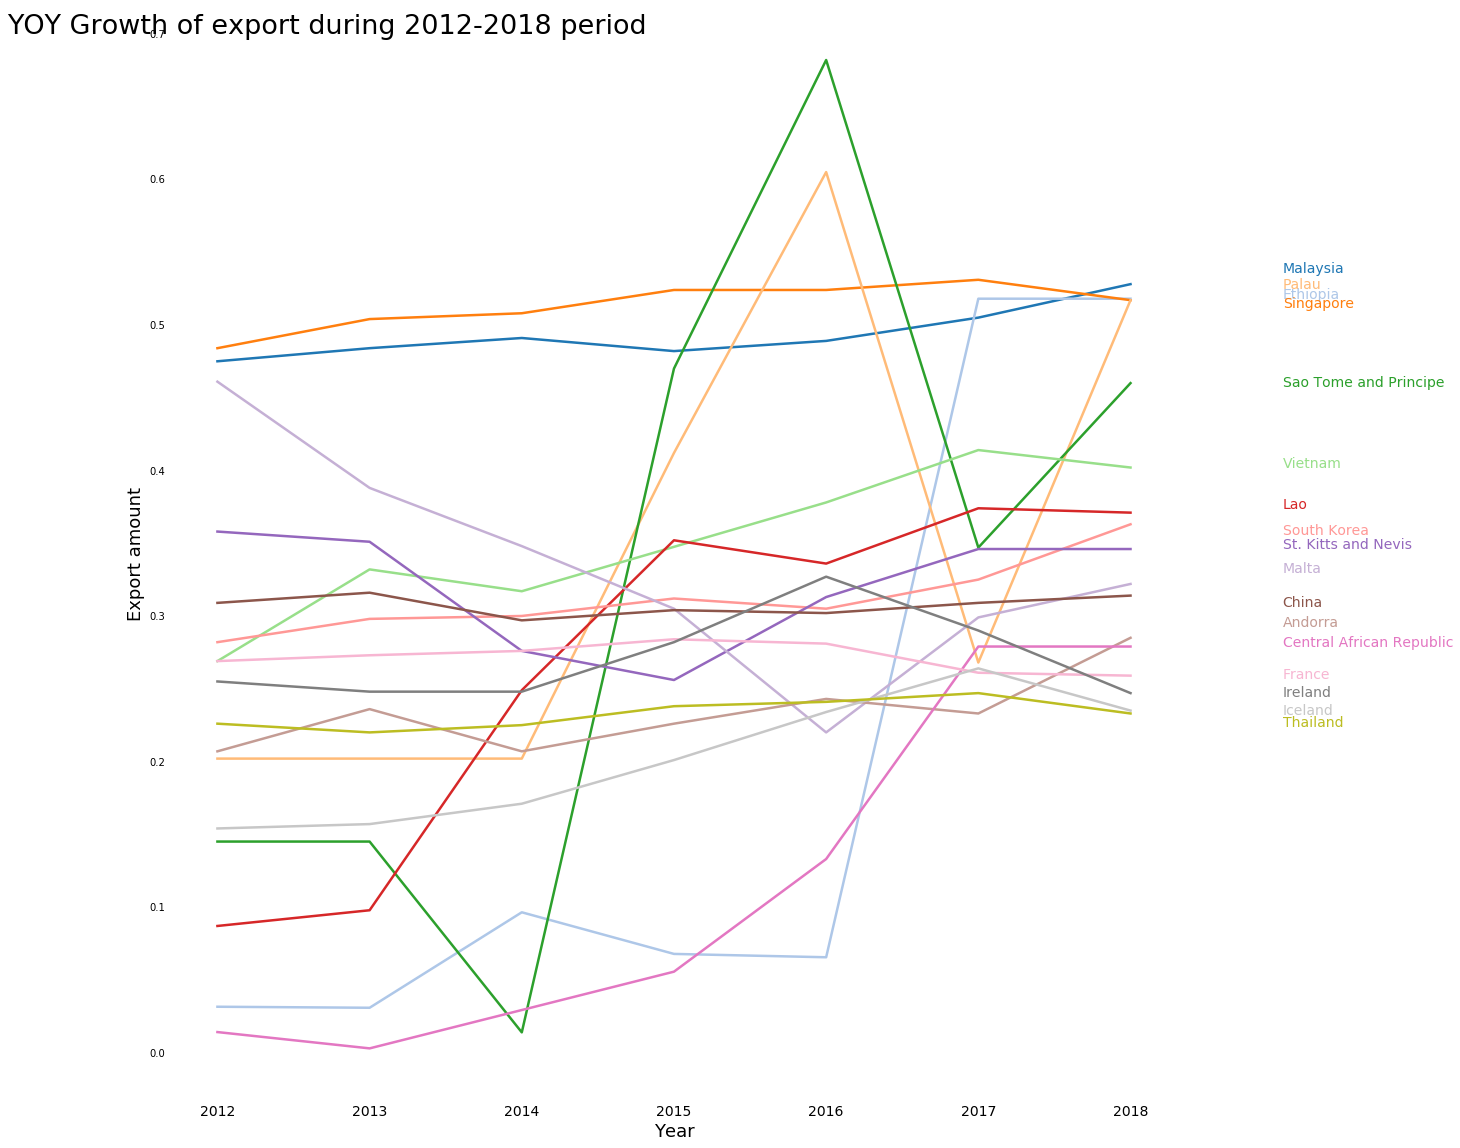

In [191]:
# You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
# exception because of the number of lines being plotted on it.    
# Common sizes: (10, 7.5) and (12, 9)    
plt.figure(figsize=(18, 20))    
  
# Remove the plot frame lines. They are unnecessary chartjunk.    
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.    
# Ticks on the right and top of the plot are generally unnecessary chartjunk.    
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  
# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
#plt.ylim(0, 90)    
#plt.xlim('2012','2018')    
  
# Make sure your axis ticks are large enough to be easily read.    
# You don't want your viewers squinting to read your plot.    
#plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)    
plt.xticks(fontsize=14)    
  
# Provide tick lines across the plot to help your viewers trace along    
# the axis ticks. Make sure that the lines are light and small so they    
# don't obscure the primary data lines.    
#for y in range(10, 91, 10):    
#    plt.plot(range(1968, 2012), [y] * len(range(1968, 2012)), "--", lw=0.5, color="black", alpha=0.3)    
  
# Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)    
  
# Now that the plot is prepared, it's time to actually plot the data!    
# Note that I plotted the majors in order of the highest % in the final year.       
 
# ['Malaysia',
#  'Singapore',
#  'Palau',
#  'Sao Tome and Principe',
#  'Vietnam',
#  'Lao',
#  'South Korea',
#  'Malta',
#  'China',
#  'Andorra',
#  'France',
#  'Ireland',
#  'Iceland',
#  'Thailand',
#  'Israel',
#  'Niger',
#  'United Kingdom']

for rank, country in enumerate(countries_list):    
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.  
        x = years
        y1 = export.loc[country][years]
        plt.plot(x,y1,lw=2.5, color=tableau20[rank])    

#       # Add a text label to the right end of every line. Most of the code below    
#     # is adding specific offsets y position because some labels overlapped.    
        y_pos = export.loc[country][years][-1] # + 0.005    
        if country == 'Malaysia':  
            y_pos += 0.0075    
        elif country == 'Singapore':    
            y_pos -= 0.005    
        elif country == 'Palau':    
            y_pos += 0.0075    
        elif country == 'Sao Tome and Principe':    
            y_pos -= 0.0025    
        elif country == 'Vietnam':    
            y_pos -= 0.0    
        elif country == 'Lao':    
            y_pos += 0.0025    
        elif country == 'South Korea':    
            y_pos -= 0.0075    
        elif country == 'Malta':    
            y_pos += 0.0075    
        elif country == 'China':    
            y_pos -= 0.0075    
        elif country == 'Andorra':    
            y_pos += 0.0075    
        elif country == 'France':    
            y_pos -= 0.0025 
        elif country == 'Ireland':    
            y_pos -= 0.0025 
        elif country == 'Iceland':    
            y_pos -= 0.003 
        elif country == 'Thailand':    
            y_pos -= 0.009 
        elif country == 'Israel':    
            y_pos -= 0.01
        elif country == 'Niger':    
            y_pos -= 0.02 
        elif country == 'United Kingdom':    
            y_pos -= 0.03
  
    # Again, make sure that all labels are large enough to be easily read    
    # by the viewer.    
        plt.text('2018+0.002', y_pos, country, fontsize=14, color=tableau20[rank])    
  # matplotlib's title() call centers the title on the plot, but not the graph,    
# so I used the text() call to customize where the title goes.    
  
# Make the title big enough so it spans the entire plot, but don't make it    
# so big that it requires two lines to show.    
  
# Note that if the title is descriptive enough, it is unnecessary to include    
# axis labels; they are self-evident, in this plot's case.    
plt.text( 0.72,0.7,"YOY Growth of export during 2012-2018 period", fontsize=27, ha="center")   
plt.ylabel('Export amount',size=18)
plt.xlabel('Year',size=18)
  
# Always include your data source(s) and copyright notice! And for your    
# data sources, tell your viewers exactly where the data came from,    
# preferably with a direct link to the data. Just telling your viewers    
# that you used data from the "U.S. Census Bureau" is completely useless:    
# the U.S. Census Bureau provides all kinds of data, so how are your    
# viewers supposed to know which data set you used?    
# plt.text(1966, -8, "Data source: nces.ed.gov/programs/digest/2013menu_tables.asp"    
#        "\nAuthor: Randy Olson (randalolson.com / @randal_olson)"    
#        "\nNote: Some majors are missing because the historical data "    
#        "is not available for them", fontsize=10)    
  
# Finally, save the figure as a PNG.    
# You can also save it as a PDF, JPEG, etc.    
# Just change the file extension in this call.    
# bbox_inches="tight" removes all the extra whitespace on the edges of your plot.    
#plt.savefig("export_growth.png", bbox_inches="tight")  
;

# Insight 6:
### - Sao Tome and Principe had *the biggest growth* in export (high technology sector) during 2012-2018 time frame,  increased from 0.15 to 0.46. But missing data for the further time period and trend of further years could be investigated 
### -  Malaysia and Singapore have stably highest export and slowly keep growing.
### - Lao and Central African Republic  had stable steep growth in late years  and could be interesting for further investigation.


## 2.3.2 Fastest tax on profit growth last years:

In [192]:
tax_profit = tax_profit.sort_values(by='2018',ascending=False)
tax_profit

,2012,2013,2014,2015,2016,2017,2018,mean_tax_profit
country,,,,,,,,
Palau,65.8,65.8,65.8,65.8,65.8,65.8,65.8,65.846667
Equatorial Guinea,20.7,20.7,20.7,20.7,53.0,53.0,53.0,29.313333
Cameroon,30.0,30.0,30.0,30.0,38.9,38.9,38.9,31.766667
Liberia,17.6,17.0,21.6,35.4,35.4,35.4,35.4,15.546667
Bhutan,33.0,33.9,33.9,33.9,33.9,33.9,33.9,33.420000
Malta,30.2,30.3,30.2,30.2,32.4,32.3,32.3,30.773333
Chad,31.3,31.3,31.3,31.3,31.3,31.3,31.3,31.300000
Honduras,28.7,30.7,29.9,31.3,31.3,31.3,31.2,28.100000
Mozambique,30.4,30.8,30.8,30.8,30.8,30.8,30.8,30.586667


In [193]:
countries_tax_profit = list(tax_profit.index)[:17] 

In [194]:
countries_tax_profit = [
'Palau',
 'Congo, Dem. Rep.',
 'Bhutan',
 'St. Vincent and the Grenadines',
 'St. Kitts and Nevis',
 'Cameroon',
 'Comoros',
 'Chad',
 'Kenya',
 'Malta',
 'Mozambique',
 'New Zealand',
 'Equatorial Guinea',
 'Myanmar',
 'Honduras',
 'Suriname',
 'Antigua and Barbuda']

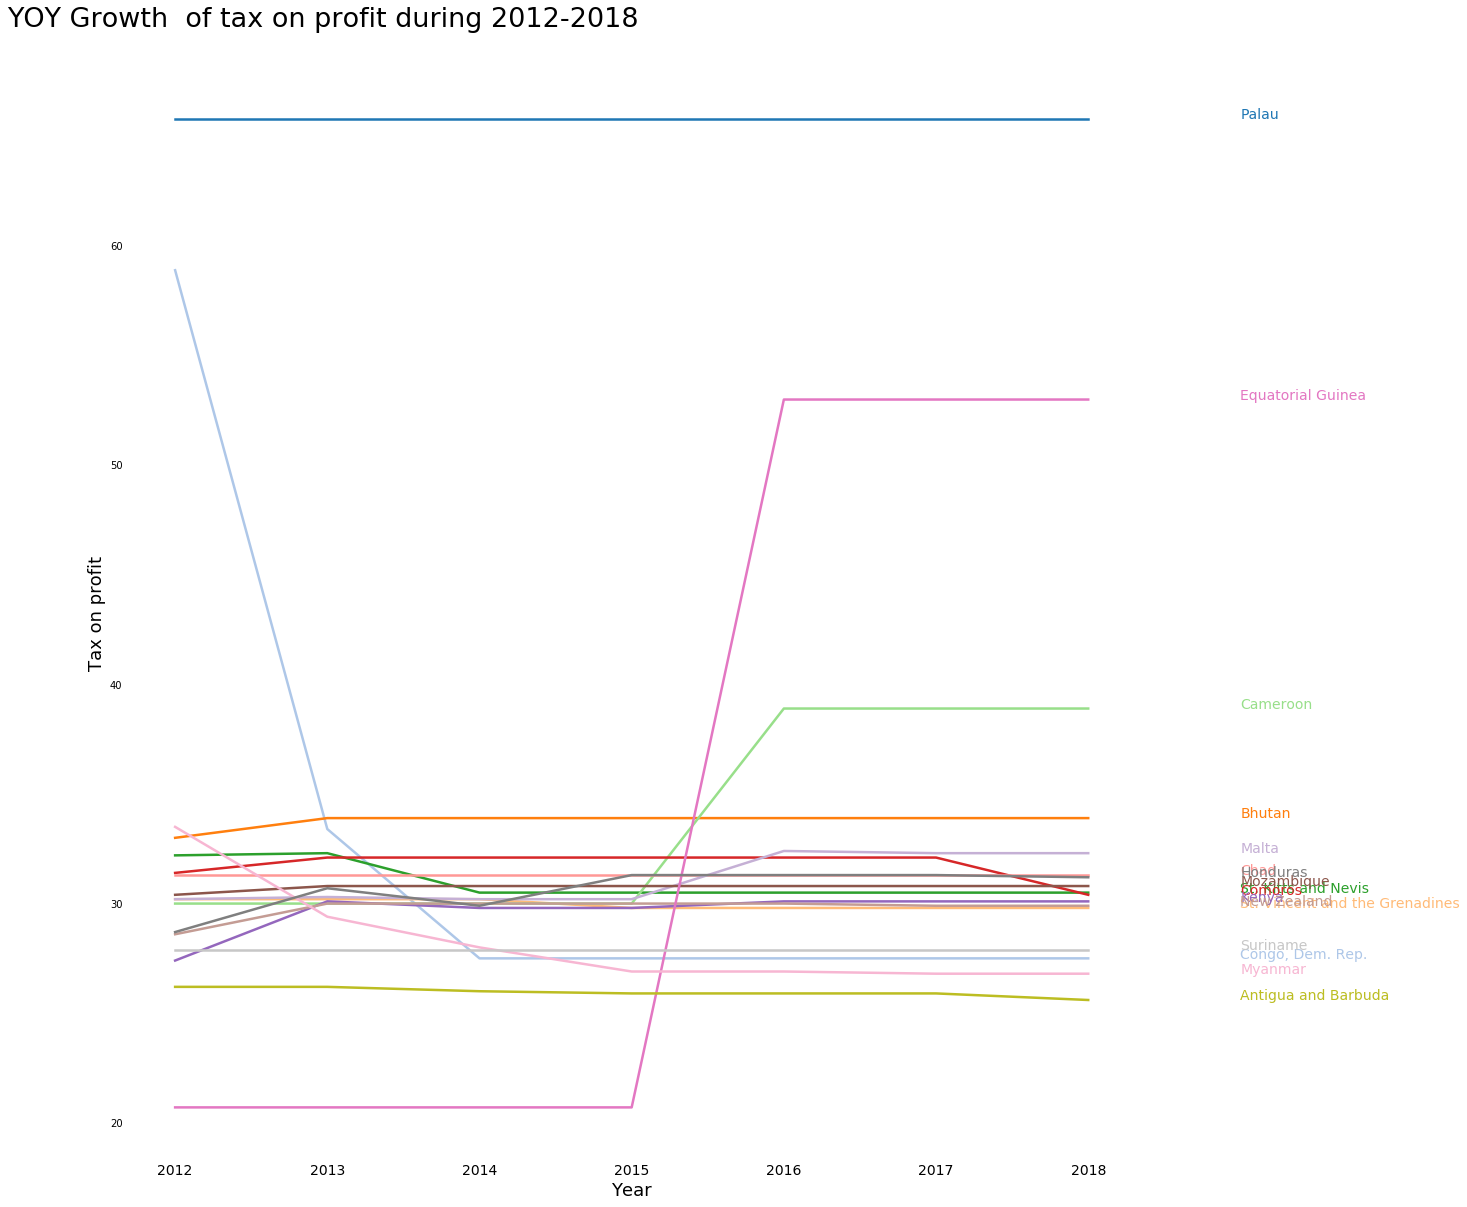

In [195]:
    
plt.figure(figsize=(18, 20))    
 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
   
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  

plt.xticks(fontsize=14)    
     
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)     

for rank, country in enumerate(countries_tax_profit):    
 
        x = years
        y1 = tax_profit.loc[country][years]
        plt.plot(x,y1,lw=2.5, color=tableau20[rank])    

  
        y_pos = tax_profit.loc[country][years][-1] # + 0.005    
        if country == 'Malaysia':  
            y_pos += 0.0075    
        elif country == 'Singapore':    
            y_pos -= 0.005    
        elif country == 'Palau':    
            y_pos += 0.0075    
        elif country == 'Sao Tome and Principe':    
            y_pos -= 0.0025    
        elif country == 'Vietnam':    
            y_pos -= 0.0    
        elif country == 'Lao':    
            y_pos += 0.0025    
        elif country == 'South Korea':    
            y_pos -= 0.0075    
        elif country == 'Malta':    
            y_pos += 0.0075    
        elif country == 'China':    
            y_pos -= 0.0075    
        elif country == 'Andorra':    
            y_pos += 0.0075    
        elif country == 'France':    
            y_pos -= 0.0025 
        elif country == 'Ireland':    
            y_pos -= 0.0025 
        elif country == 'Iceland':    
            y_pos -= 0.003 
        elif country == 'Thailand':    
            y_pos -= 0.009 
        elif country == 'Israel':    
            y_pos -= 0.01
        elif country == 'Niger':    
            y_pos -= 0.02 
        elif country == 'United Kingdom':    
            y_pos -= 0.03
    
        plt.text('2018+0.002', y_pos, country, fontsize=14, color=tableau20[rank])    
    
plt.text( 1,70,"YOY Growth  of tax on profit during 2012-2018 ", fontsize=27, ha="center")
plt.ylabel('Tax on profit',size = 18)
plt.xlabel('Year',size = 18);  


# Insight 7:
### - Equatorial Guinea and Cameron had the biggest growth on tax on profit.
### - Palau has the highest tax on profit within all top 17 countries
### - Myanmar had the biggest drop during these years

## 2.3.3 Fastest income growth last years:

In [196]:
income = income.sort_values(by='2018',ascending=False)
income.head(10)

,2012,2013,2014,2015,2016,2017,2018,mean_income
country,,,,,,,,
Qatar,120000,118000,117000,116000,114000,113000,113000,115857.142857
Luxembourg,89500,90700,92300,93700,93900,93100,93700,92414.285714
Singapore,77500,79900,82000,83300,84700,87800,90100,83614.285714
Brunei,82200,79300,76400,75100,72400,72500,71800,75671.428571
Ireland,44800,45200,48800,60500,62800,66600,70400,57014.285714
United Arab Emirates,57900,60400,62900,65800,67000,66700,66600,63900.000000
Kuwait,78700,75600,72600,70300,70100,66000,65500,71257.142857
Norway,63000,62900,63400,64000,64200,65000,65400,63985.714286
Switzerland,56200,56500,57200,57300,57600,58000,59000,57400.000000


In [197]:
countries_income = list(income.index)[:17] 

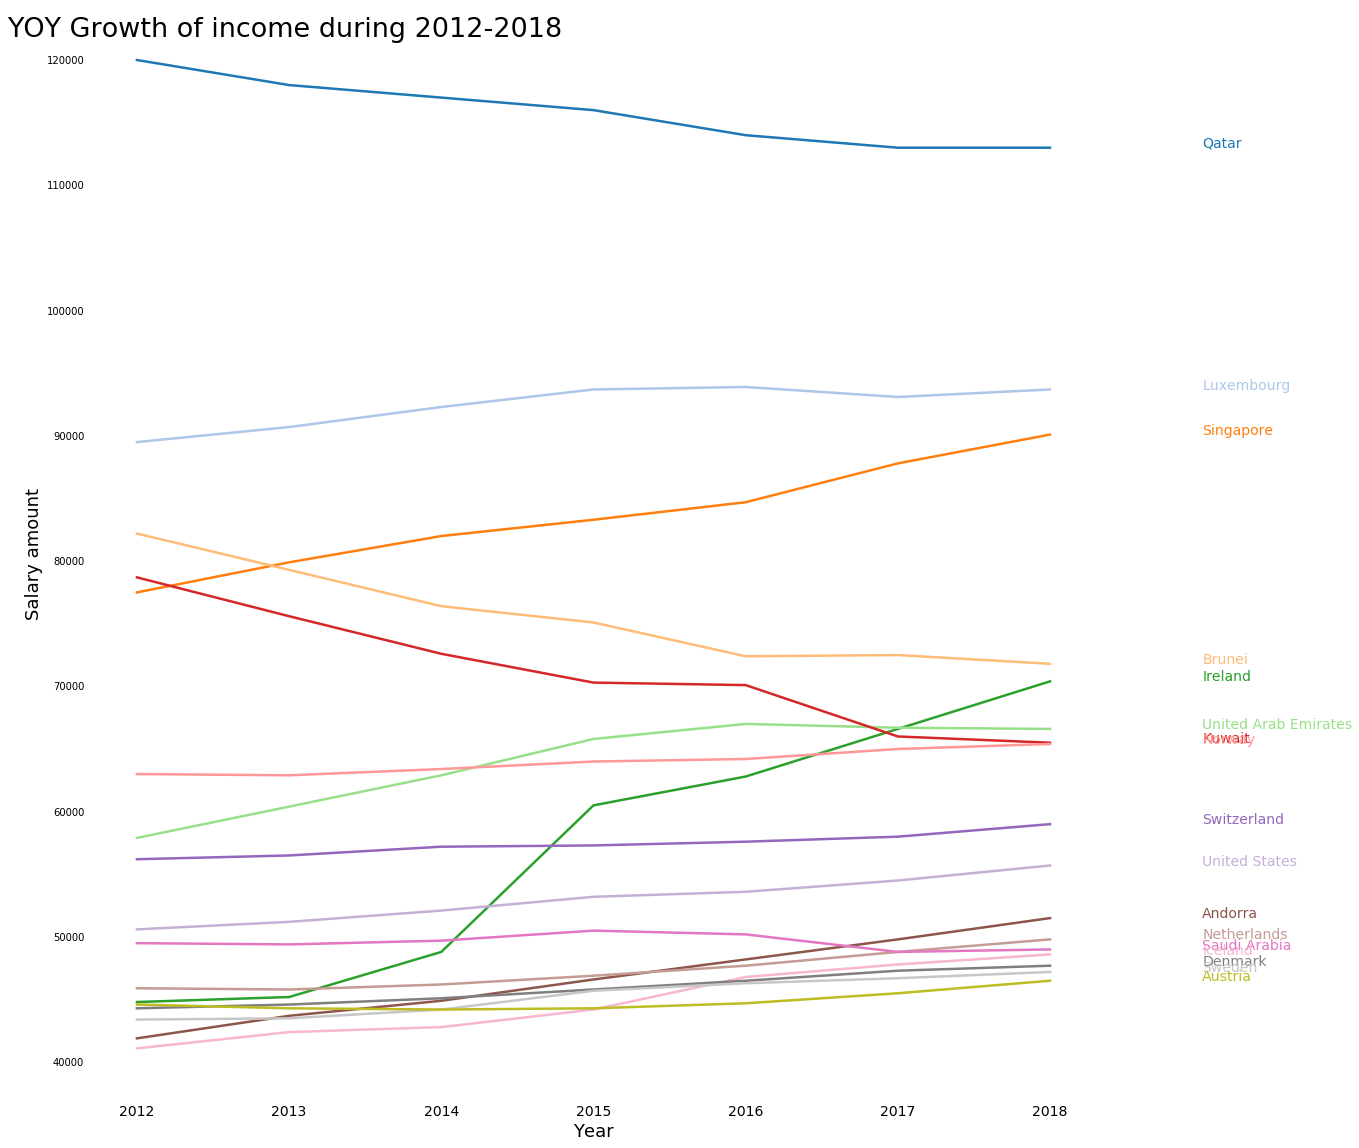

In [198]:
plt.figure(figsize=(18, 20))    
 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
   
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  

plt.xticks(fontsize=14)    
     
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)     

for rank, country in enumerate(countries_income):    
 
        x = years
        y1 = income.loc[country][years]
        plt.plot(x,y1,lw=2.5, color=tableau20[rank])    

  
        y_pos = income.loc[country][years][-1] # + 0.005    
        if country == 'Malaysia':  
            y_pos += 0.0075    
        elif country == 'Singapore':    
            y_pos -= 0.005    
        elif country == 'Palau':    
            y_pos += 0.0075    
        elif country == 'Sao Tome and Principe':    
            y_pos -= 0.0025    
        elif country == 'Vietnam':    
            y_pos -= 0.0    
        elif country == 'Lao':    
            y_pos += 0.0025    
        elif country == 'South Korea':    
            y_pos -= 0.0075    
        elif country == 'Malta':    
            y_pos += 0.0075    
        elif country == 'China':    
            y_pos -= 0.0075    
        elif country == 'Andorra':    
            y_pos += 0.0075    
        elif country == 'France':    
            y_pos -= 0.0025 
        elif country == 'Ireland':    
            y_pos -= 0.0025 
        elif country == 'Iceland':    
            y_pos -= 0.003 
        elif country == 'Thailand':    
            y_pos -= 0.009 
        elif country == 'Israel':    
            y_pos -= 0.01
        elif country == 'Niger':    
            y_pos -= 0.02 
        elif country == 'United Kingdom':    
            y_pos -= 0.03
    
        plt.text('2018+0.002', y_pos, country, fontsize=14, color=tableau20[rank])    
    
plt.text(1,121870, "YOY Growth of income during 2012-2018 ", fontsize=27, ha="center") 
plt.ylabel('Salary amount',size = 18)
plt.xlabel('Year',size = 18);  


# Insight 8 :
### - Ireland and Singapur had the highest growth of income during these time period
### - Qatar, Kuwait, Brunei having decline

## 2.3.4 Fastest HDI growth last years:

In [199]:
hdi = hdi.sort_values(by='2018',ascending=False)
hdi.head(10)

,2012,2013,2014,2015,2016,2017,2018,mean_hdi
country,,,,,,,,
Norway,0.942,0.946,0.945,0.948,0.951,0.953,0.954,0.917931
Switzerland,0.935,0.938,0.939,0.943,0.943,0.943,0.946,0.896690
Ireland,0.899,0.908,0.920,0.926,0.936,0.939,0.942,0.864241
Germany,0.927,0.927,0.930,0.933,0.936,0.938,0.939,0.884655
Australia,0.932,0.926,0.929,0.933,0.935,0.937,0.938,0.905138
Iceland,0.908,0.920,0.924,0.927,0.932,0.935,0.938,0.876310
Sweden,0.908,0.927,0.929,0.932,0.934,0.935,0.937,0.891172
Singapore,0.920,0.923,0.928,0.929,0.933,0.934,0.935,0.845207
Netherlands,0.921,0.924,0.925,0.927,0.929,0.932,0.934,0.888586


In [200]:
countries_hdi = list(hdi.index)[:17] 

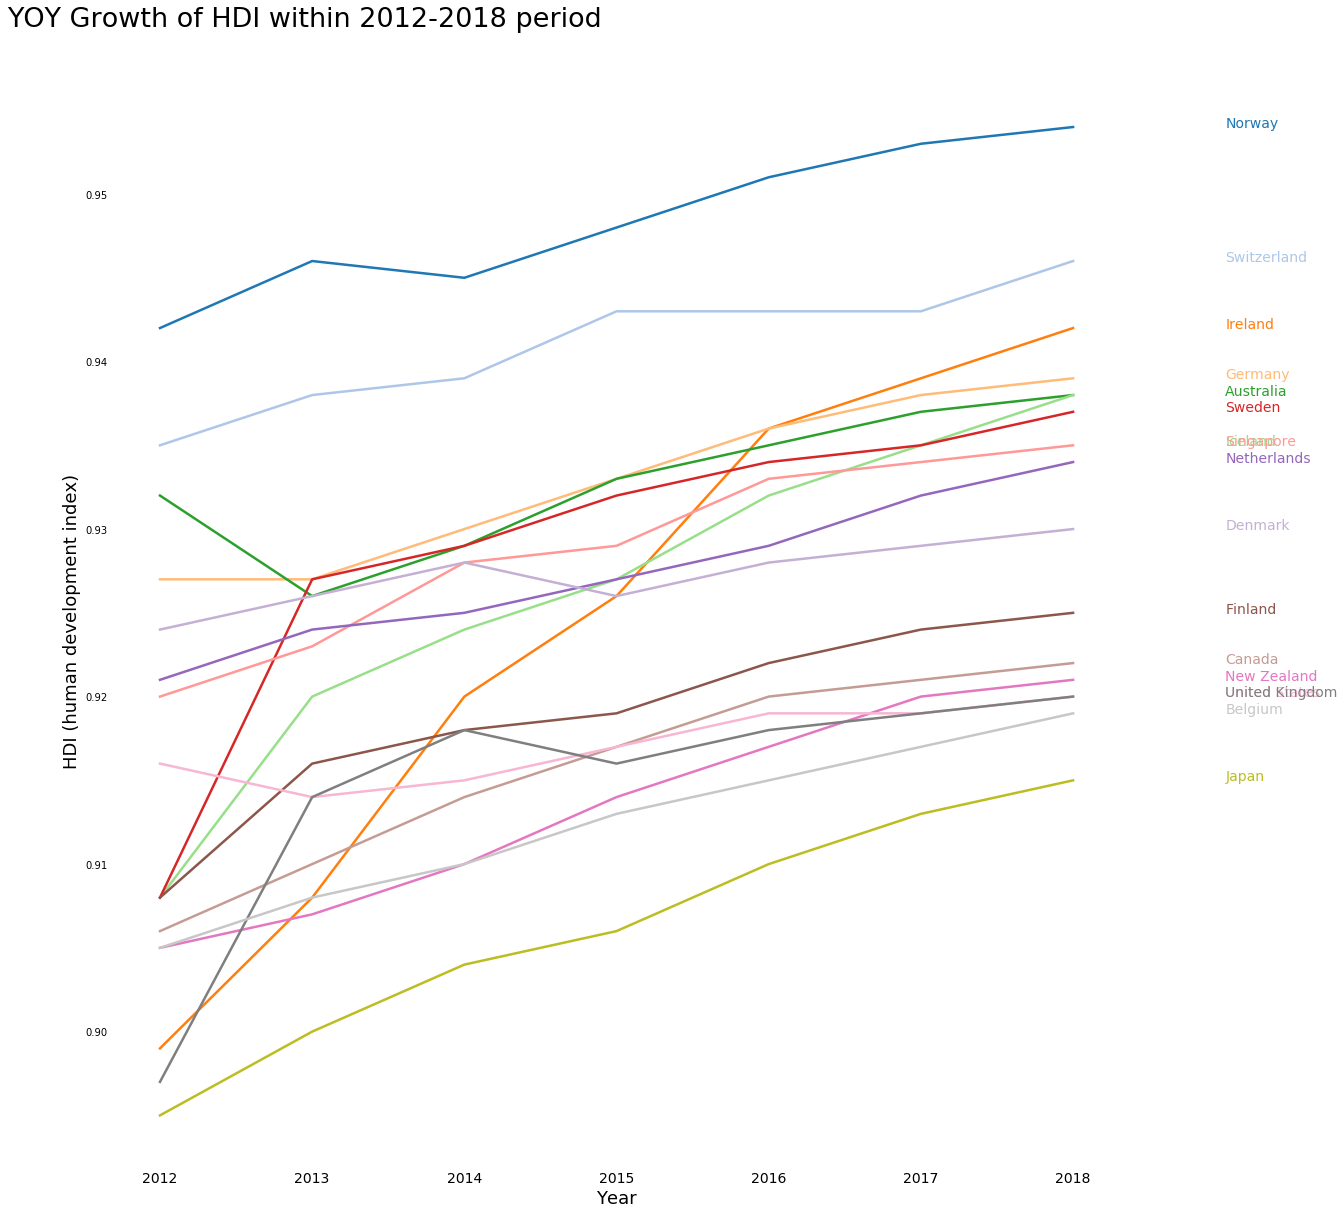

In [201]:
    
plt.figure(figsize=(18, 20))    
 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
   
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
  

plt.xticks(fontsize=14)    
     
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)     

for rank, country in enumerate(countries_hdi):    
 
        x = years
        y1 = hdi.loc[country][years]
        plt.plot(x,y1,lw=2.5, color=tableau20[rank])    

  
        y_pos = hdi.loc[country][years][-1] # + 0.005    
        if country == 'Malaysia':  
            y_pos += 0.0075    
        elif country == 'Singapore':    
            y_pos -= 0.00   
        elif country == 'Palau':    
            y_pos += 0.0075    
        elif country == 'Sao Tome and Principe':    
            y_pos -= 0.0025    
        elif country == 'Vietnam':    
            y_pos -= 0.0    
        elif country == 'Lao':    
            y_pos += 0.0025    
        elif country == 'South Korea':    
            y_pos -= 0.0075    
        elif country == 'Malta':    
            y_pos += 0.0075    
        elif country == 'China':    
            y_pos -= 0.0075    
        elif country == 'Andorra':    
            y_pos += 0.0075    
        elif country == 'France':    
            y_pos -= 0.0025 
        elif country == 'Ireland':    
            y_pos -= 0.00
        elif country == 'Iceland':    
            y_pos -= 0.003 
        elif country == 'Thailand':    
            y_pos -= 0.009 
        elif country == 'Israel':    
            y_pos -= 0.01
        elif country == 'Niger':    
            y_pos -= 0.02 
        elif country == 'United Kingdom':    
            y_pos -= 0.0
    
        plt.text('2018+0.002', y_pos, country, fontsize=14, color=tableau20[rank])    
    
plt.text(0.95,0.96, "YOY Growth of HDI within 2012-2018 period", fontsize=27, ha="center")
plt.ylabel('HDI (human development index)',size = 18)
plt.xlabel('Year',size = 18);   


## Insight 9:
### - Overall all countries leveled up in Human Development index, which takes into consideration health level, education level and standards of living. 
### - Ireland in particular showe the highest , very steep growth of the course of 2012-2018 years

# Part 3. Summary and Conclusions

### 1. Overall the higher education in the country, the higher salaries are. But there are countries exceptions , where education is one of the highest , but  wages ones of the lowest.  Such countries are Georgia and  Slovak Republic.  They could be considered as countries with potentially good opportunities to run a business - education is high and work force pay is low

### 2.  By looking at export and tax profit,  countries  - Singapore, Malaysia, Palau, Malta, Costa Rica, Kazakhstan,South Korea - could be potentially good opportunity for investment. Those have highest export ( high technology sector) and highest  tax on profit was high  along with sutisfactory income and human development index.

### 3. While taking into consideration all 4 parameters(export,tax on profit,hdi,income) with given weights to each,  top 5 countries with highest investment potential:
- Palau
- Malaysia
- Malta
- Costa Rica
- Kazakhstan

### 4. By averaging contribution of each parameter into Business development index and tracking it over recent years, according to this index best countries to invest in, with fastest growing business potential:
- Palau
- Malasya
- Sao Tome and Principe
- South Korea
- Ephiopia*

*showed promising trend and could be investigated further

### 5. Sao Tome and Principe had *the biggest growth* in export during 2012-2018 time frame. While Malaysia and Lao has have stably highest export and slowly keep growing. 


### 6. Equatorial Guinea and Cameron had the biggest growth on tax on profit.  Palau has the highest tax on profit . While Myannmar had the fastest drop.  

### 7. Ireland and Singapur had the highest growth of income during these time period. While  Qatar, Kuwait, Brunei having decline in recent years

### 8. Overall all countries leveled up in Human Development index, which takes into consideration health level, education level and standards of living. 
### Ireland in particular showed the highest , very steep growth of the course of 2012-2018 years. Might be due to Brexit and by becoming  the most appealing place to move business from UK.

### Limitations:

** Datasets source is supposed to be rather for educational reason and can't garanty high accuracy and be 100% reliable for any actionables 

<br> 1. Datasets had a lot of missing values, and due to that many observations has to be dropped/filled, and some years intervals hast to be cut of to keep integrity of time period for all data sets.
Dataset of Master degrees by country suffered from missing values the most. But no better dataset could be found, which could tell about level of high education by country
<br> 2. Some findings suggested good level of development in some countries, although during 1912-1918 year,and no data after year 2018 were available to confirm that trend. **
